In [7]:
from sklearn import datasets 
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
from sklearn.datasets import fetch_openml
dataset = fetch_openml("mnist_784")
print(dataset.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])


In [22]:
x=dataset.data[:500]
y=dataset.target[:500]

In [23]:
trainX, testX, trainY, testY = train_test_split(x,y, test_size=0.3, random_state=12)

In [24]:
k_Values = range(2, 30, 1)
testaccuracies = []
trainaccuracies = []
## loop for different values of k
for k in range(2, 30, 1):
          model = KNeighborsClassifier(n_neighbors=k)
          model.fit(trainX, trainY)
          s1 = model.score(testX, testY)
          s2 = model.score(trainX, trainY)
          print("k=%d, test accuracy=%.2f%%" % (k, s1 * 100))
          print("k=%d, train accuracy=%.2f%%" % (k, s2 * 100))
          testaccuracies.append(s1)
          trainaccuracies.append(s2)

k=2, test accuracy=83.33%
k=2, train accuracy=92.29%
k=3, test accuracy=82.00%
k=3, train accuracy=91.43%
k=4, test accuracy=82.00%
k=4, train accuracy=89.43%
k=5, test accuracy=80.67%
k=5, train accuracy=90.00%
k=6, test accuracy=80.67%
k=6, train accuracy=88.86%
k=7, test accuracy=82.00%
k=7, train accuracy=87.14%
k=8, test accuracy=82.00%
k=8, train accuracy=85.71%
k=9, test accuracy=83.33%
k=9, train accuracy=85.71%
k=10, test accuracy=79.33%
k=10, train accuracy=85.71%
k=11, test accuracy=79.33%
k=11, train accuracy=83.71%
k=12, test accuracy=80.00%
k=12, train accuracy=83.43%
k=13, test accuracy=80.00%
k=13, train accuracy=84.00%
k=14, test accuracy=78.67%
k=14, train accuracy=82.86%
k=15, test accuracy=78.00%
k=15, train accuracy=82.57%
k=16, test accuracy=76.00%
k=16, train accuracy=82.00%
k=17, test accuracy=78.00%
k=17, train accuracy=80.57%
k=18, test accuracy=77.33%
k=18, train accuracy=80.29%
k=19, test accuracy=77.33%
k=19, train accuracy=79.14%
k=20, test accuracy=74.67%

In [25]:
## determine highest accuracy

itest = np.argmax(testaccuracies)
itrain = np.argmax(trainaccuracies)
print("k=%d highest test accuracy of %.2f%%" % (k_Values[itest],  testaccuracies[itest] * 100))
print("k=%d highest train accuracy of %.2f%%" % (k_Values[itrain], trainaccuracies[itrain] * 100))

k=2 highest test accuracy of 83.33%
k=2 highest train accuracy of 92.29%


In [26]:
model = KNeighborsClassifier(n_neighbors=k_Values[itest])
model.fit(trainX, trainY)
Predict = model.predict(testX)

In [27]:
print("Evaluation")
print(classification_report(testY, Predict))

Evaluation
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.68      1.00      0.81        23
           2       0.87      0.65      0.74        20
           3       0.83      0.83      0.83        18
           4       0.89      0.67      0.76        12
           5       0.67      0.67      0.67         9
           6       0.92      0.92      0.92        12
           7       0.86      0.90      0.88        20
           8       1.00      0.62      0.77         8
           9       0.92      0.86      0.89        14

    accuracy                           0.83       150
   macro avg       0.86      0.81      0.83       150
weighted avg       0.85      0.83      0.83       150



In [28]:
print("Confusion Matrix")
print(confusion_matrix(testY, Predict))

Confusion Matrix
[[14  0  0  0  0  0  0  0  0  0]
 [ 0 23  0  0  0  0  0  0  0  0]
 [ 0  5 13  0  0  1  0  1  0  0]
 [ 0  0  2 15  0  1  0  0  0  0]
 [ 0  1  0  0  8  0  1  1  0  1]
 [ 0  1  0  2  0  6  0  0  0  0]
 [ 0  1  0  0  0  0 11  0  0  0]
 [ 0  2  0  0  0  0  0 18  0  0]
 [ 0  1  0  0  1  1  0  0  5  0]
 [ 0  0  0  1  0  0  0  1  0 12]]


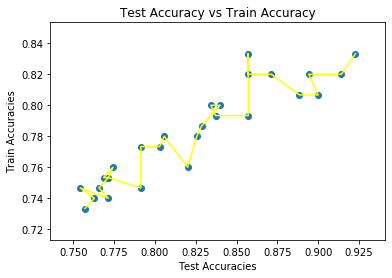

In [29]:
## plotting all respective values of k
plt.scatter(trainaccuracies,testaccuracies)
plt.plot(trainaccuracies,testaccuracies,c="yellow")
plt.xlabel("Test Accuracies")
plt.ylabel("Train Accuracies")
plt.title("Test Accuracy vs Train Accuracy")
plt.show()